<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

<Ответ>

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

<Ответ>

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

<Ответ>

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

%matplotlib inline

### Анализируем данные

In [40]:
data = pd.read_csv('train.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Date')
data.index.names=['Timestamp']

In [41]:
data.head()

,ID,tsID,ACTUAL,Temp,Saturday,Sunday
Timestamp,,,,,,
2010-01-01,1,4,35489.95,-0.9,0.0,1
2010-01-02,2,4,35413.59,-0.1,1.0,0
2010-01-03,3,4,34802.67,-3.9,0.0,1
2010-01-04,4,4,36003.84,-13.7,0.0,1
2010-01-05,5,4,37622.96,-16.9,0.0,1


In [42]:
data.dtypes

ID            int64
tsID          int64
ACTUAL      float64
Temp        float64
Saturday    float64
Sunday        int64
dtype: object

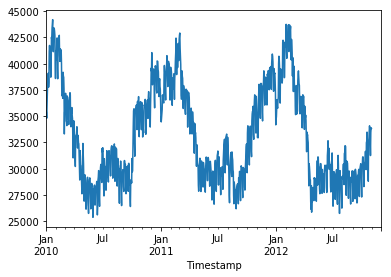

In [886]:
data.loc[data.tsID == 4, 'ACTUAL'].plot()
# data.loc[data.tsID == 4, 'ACTUAL'].plot()


In [887]:
np.unique(data.tsID)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

### Данные конкретного временного ряда c $id=4$

In [938]:
forecast_hor = 30

In [939]:
ts_id = 4

In [1303]:
cur_ts = data.loc[data.tsID == ts_id]

#### Сколько наблюдений за конкретный год

In [1304]:
print("Количество наблюдений за 2010 год {}".format(len(cur_ts[cur_ts.year == 2010])))
print("Количество наблюдений за 2011 год {}".format(len(cur_ts[cur_ts.year == 2011])))
print("Количество наблюдений за 2012 год {}".format(len(cur_ts[cur_ts.year == 2012])))

Количество наблюдений за 2010 год 365
Количество наблюдений за 2011 год 365
Количество наблюдений за 2012 год 335


In [1305]:
cur_ts.head()

,ID,tsID,ACTUAL,Temp,Saturday,Sunday,month,year
Timestamp,,,,,,,,
2010-01-01,1,4,35489.95,-0.9,0.0,1,1,2010
2010-01-02,2,4,35413.59,-0.1,1.0,0,1,2010
2010-01-03,3,4,34802.67,-3.9,0.0,1,1,2010
2010-01-04,4,4,36003.84,-13.7,0.0,1,1,2010
2010-01-05,5,4,37622.96,-16.9,0.0,1,1,2010


In [1306]:
cur_ts_forecast_id = cur_ts['ID'][-forecast_hor:]
cur_ts = cur_ts[['ACTUAL', 'Temp']]

In [1307]:
import statsmodels.api as sm

In [1308]:
cur_ts.tail()

,ACTUAL,Temp
Timestamp,,
2012-11-26,NaN,-1.8
2012-11-27,NaN,-1.5
2012-11-28,NaN,-1.5
2012-11-29,NaN,-1.0
2012-11-30,NaN,4.0


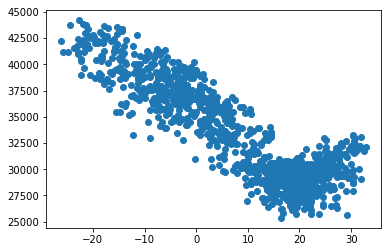

In [1309]:
plt.scatter(cur_ts['Temp'], cur_ts['ACTUAL'])

In [1310]:
cur_ts_test = cur_ts.tail(30)
cur_ts = cur_ts[:-30]

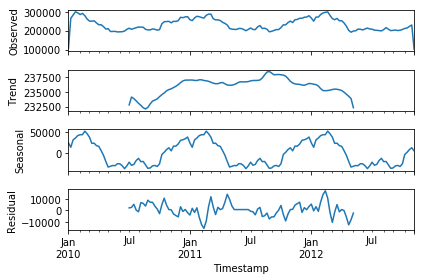

In [1311]:
res = sm.tsa.seasonal_decompose(cur_ts['ACTUAL'].resample("W").sum())
resplot = res.plot()

In [1312]:
cur_ts_test.fillna(0, inplace=True)
cur_ts_test.head()

,ACTUAL,Temp
Timestamp,,
2012-11-01,0.0,3.0
2012-11-02,0.0,1.8
2012-11-03,0.0,0.0
2012-11-04,0.0,2.0
2012-11-05,0.0,7.8


In [1313]:
cur_ts.tail()

,ACTUAL,Temp
Timestamp,,
2012-10-27,32194.01,4.0
2012-10-28,31246.77,5.0
2012-10-29,33454.83,10.5
2012-10-30,33894.82,8.8
2012-10-31,33838.25,10.5


In [1314]:
from sklearn.preprocessing import MinMaxScaler

In [1315]:
scaler = MinMaxScaler()
cur_ts_scaled = scaler.fit_transform(cur_ts.values)
# cur_ts_test_scaled = scaler.fit_transform(cur_ts_test)

In [1316]:
# cur_ts_test_scaled

In [1317]:
cur_ts_scaled

array([[ 0.53775112,  0.4278438 ],
       [ 0.53369675,  0.44142615],
       [ 0.50125969,  0.37691002],
       ..., 
       [ 0.42969553,  0.62139219],
       [ 0.453057  ,  0.59252971],
       [ 0.45005339,  0.62139219]])

In [1318]:
"""создаёт матрицу - объекты-признаки, 
    признаки - наблюдения на предыдущих n_in шагах
    объекты - наблюдение на текущем шаге"""
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [1319]:
reframed = series_to_supervised(cur_ts_scaled, n_in=7, n_out=1)
reframed.head()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
7,0.537751,0.427844,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015
8,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256
9,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696
10,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918,0.196944
11,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918,0.196944,0.869546,0.235993


In [1320]:
reframed.drop(reframed.columns[[-1]], axis=1, inplace=True)
reframed.head()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t)
7,0.537751,0.427844,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313
8,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221
9,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865
10,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918
11,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918,0.196944,0.869546


In [1321]:
reframed.shape
# reframed.columns[]

(1028, 15)

In [1322]:
# split into train and test sets
values = reframed.values
n_train_days = math.ceil(len(reframed)*0.8)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
print(n_train_days)

823


In [1323]:
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1:]
test_X = test[:, :-1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [1324]:
# print(train_y)
# train_y = np.transpose(train_y)
# test_y = np.transpose(test_y)
# print(train_y)
print(train_X.shape, train_y.shape, test_X.shape)


(823, 1, 14) (823, 1) (205, 1, 14)


In [1325]:
from utils import qualityMAPE
from sklearn.linear_model import LinearRegression, LogisticRegression

In [1326]:
lr = LinearRegression()
lr.fit(train_X.squeeze(), train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1327]:
# make a prediction
# lr_yhat = lr.predict(test_X)
# print(lr_yhat.shape)
# lr_yhat
# make a prediction
lr_yhat = lr.predict(test_X.squeeze())
# print(lr.predict(test_X.squeeze()))
lr_yhat.shape

(205, 1)

In [1328]:
# invert scaling for forecast
# lr_inv_yhat = np.concatenate((lr_yhat, 
#                               np.zeros((len(lr_yhat), 1))), axis=1)
# print(lr_inv_yhat.shape)
# print(scaler.min_)
lr_inv_yhat = np.concatenate((lr_yhat, 
                              np.zeros((len(lr_yhat), 1))), axis=1)
lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)
lr_inv_yhat = lr_inv_yhat[:,0]

In [1329]:
# lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)
# lr_inv_yhat = scaler.inverse_transform(lr_yhat)

In [1330]:
# print(lr_inv_yhat)

In [1331]:
# lr_inv_yhat = lr_inv_yhat[:,0]

In [1332]:
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = np.concatenate((test_y, np.zeros((len(test_y), 1))), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
test_y = cur_ts['ACTUAL'][n_train_days+7:]
# test_y
# np.array(test_y)

In [1333]:
def MAPE(x, y):
    # Mean absolute percentage error
    qlt = (abs(x-y)/x)
#     print(qlt.shape)
    return qlt.mean()

In [1334]:
mape = MAPE(np.array(test_y), lr_inv_yhat)

# print('Test RMSE: %.3f, %.3f' % (rmse, rmse2))
print('Test MAPE: %.3f' % (mape))

Test MAPE: 0.030


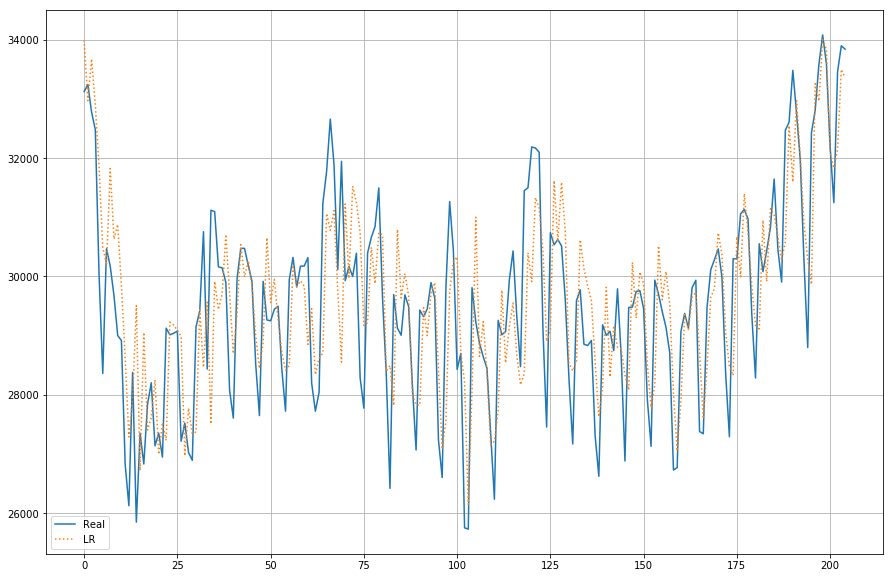

In [1335]:
plt.figure(figsize=(15,10))
plt.plot(np.array(test_y), label='Real')
# plt.plot(inv_yhat, '-.', linewidth=2, label='Predicted')
plt.plot(lr_inv_yhat, ':', label='LR')
plt.grid()
plt.legend()

## Как будет предсказывать модель на 30 дней вперёд

In [1553]:
scaler = MinMaxScaler()
cur_ts_scaled = scaler.fit_transform(cur_ts.values)

In [1554]:
reframed = series_to_supervised(cur_ts_scaled, n_in=7, n_out=1)
# reframed.drop(reframed.columns[[-1]], axis=1, inplace=True)

In [1555]:
reframed.head()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
7,0.537751,0.427844,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015
8,0.533697,0.441426,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256
9,0.501260,0.376910,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696
10,0.565036,0.210526,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918,0.196944
11,0.651004,0.156197,0.684206,0.166384,0.690582,0.146010,0.729313,0.219015,0.658221,0.341256,0.682865,0.310696,0.837918,0.196944,0.869546,0.235993


In [1556]:
values = reframed.values
n_test_days = 30

In [1557]:
train = values[:-n_test_days, :]
test = values[-n_test_days:, :]
test.shape

(30, 16)

In [1558]:
# split into input and outputs
train_X, train_y = train[:, :-2], train[:, -2:]
test_X, test_y = test[:, :-2], test[:, -2:]

In [1559]:
# print(train_y[:10])
# # tr_y = np.transpose(train_y)
# # tr_y = tr_y[0][:, None]
# print(tr_y[:10])

In [1560]:
train_X.shape

(998, 14)

In [1561]:
import warnings

In [1562]:
%%time
n_days = 30
y_pred = []

warnings.filterwarnings('ignore')

for day in range(n_days):
#     print("day ", day)
#     print("train_x[-1] ", train_X[-1])
#     print("train_y[-1] ", train_y[-1])
    lr = LinearRegression()
    tr_y = np.transpose(train_y)
    tr_y = tr_y[0][:, None]
    lr.fit(train_X, tr_y)
    # make a prediction
    shift_row = np.roll(train_X[-1], -2)
    shift_row[-2] = train_y[-1][0]
    shift_row[-1] = train_y[-1][1]
#     print("shift_row ", shift_row)
    lr_yhat = lr.predict(shift_row)
#     print("lr_yhat ", lr_yhat)
    # invert scaling for forecast
    lr_inv_yhat = np.concatenate((lr_yhat, 
                                  np.zeros((len(lr_yhat), 1))), axis=1)
    lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)
    lr_inv_yhat = lr_inv_yhat[:,0]
    
#     print("train_X", train_X)
    train_X = np.vstack((train_X, shift_row))
#     print("test y ", test_y[day][1])
#     print("yhat ", lr_inv_yhat)
    train_y = np.vstack((train_y, [lr_yhat[0][0], test_y[day][1]]))
    
    y_pred.append(lr_inv_yhat)
#     print('----------------------------------------------------------------------------------------------------')

Wall time: 39.1 ms


In [1563]:
# y_pred

In [1564]:
# invert scaling for actual
# test_y = test[:, -2:-1]
inv_y = np.concatenate((tr_y, 
                        np.zeros((len(tr_y), 1))), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [1565]:
test_y2 = cur_ts['ACTUAL'][-30:]

In [1566]:
mape = MAPE(y_pred, np.array(test_y2))

print('Test MAPE: %.5f' % (mape))

Test MAPE: 0.05147


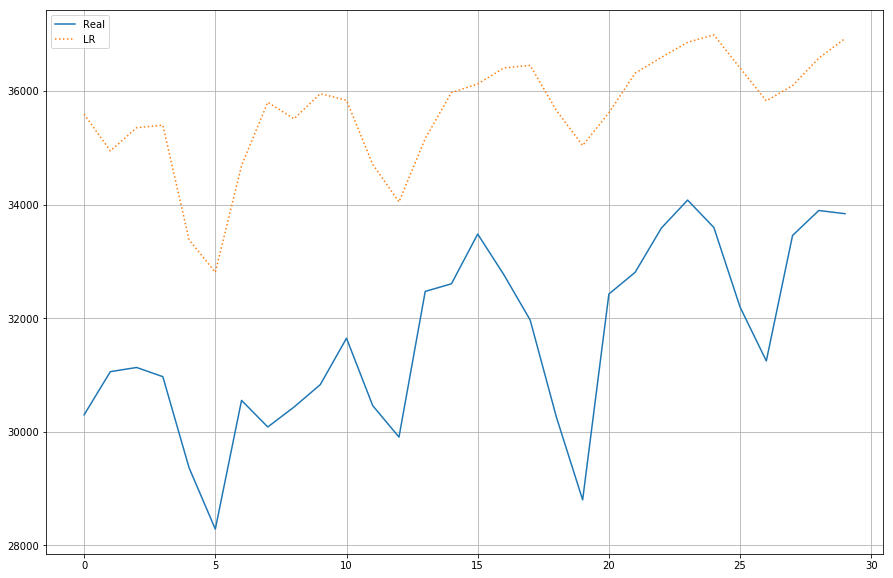

In [1654]:
plt.figure(figsize=(15,10))
plt.plot(np.array(test_y2), label='Real')
plt.plot(y_pred, ':', label='LR')
plt.grid()
plt.legend()

## Делаем то же самое для всех временных рядов

In [1734]:
forecast_hor = 30
tsID = np.unique(data.tsID)
# tsID = [1]

In [1735]:
def get_prediction(train_X, train_y, test_y, scaler, n_days=30):
    y_pred = []

    warnings.filterwarnings('ignore')

    for day in range(n_days):
#         print("day ", day)
#         print("train_x[-1] ", train_X[-1])
#         print("train_y[-1] ", train_y[-1])
        lr = LinearRegression()
        tr_y = np.transpose(train_y)
        tr_y = tr_y[0][:, None]
        lr.fit(train_X, tr_y)
        # make a prediction
        shift_row = np.roll(train_X[-1], -2)
        shift_row[-2] = train_y[-1][0]
        shift_row[-1] = train_y[-1][1]
    #     print("shift_row ", shift_row)
        lr_yhat = lr.predict(shift_row)
    #     print("lr_yhat ", lr_yhat)
        # invert scaling for forecast
        lr_inv_yhat = np.concatenate((lr_yhat, 
                                      np.zeros((len(lr_yhat), 1))), axis=1)
        lr_inv_yhat = scaler.inverse_transform(lr_inv_yhat)
        lr_inv_yhat = lr_inv_yhat[:,0]

    #     print("train_X", train_X)
        train_X = np.vstack((train_X, shift_row))
    #     print("test y ", test_y[day][1])
    #     print("yhat ", lr_inv_yhat)
        train_y = np.vstack((train_y, [lr_yhat[0][0], test_y[day][1]]))

        y_pred.append(lr_inv_yhat)
    return y_pred

In [1736]:
res_table = pd.DataFrame()

In [1737]:
%%time
for ts_id in tsID:
    scaler_train, scaler_test = MinMaxScaler(), MinMaxScaler()
    # вытаскиваем ряд с конкретным id
    cur_ts = data.loc[data.tsID == ts_id]
    
     # вытаскиваем индексы
    cur_ts_forecast_id = cur_ts['ID'][-forecast_hor:]
    
    # оставляем значения только 'ACTUAL', 'Temp'
    cur_ts = cur_ts[['ACTUAL', 'Temp']]
    
    # разделяем на данные, которые не предсказаны
    cur_ts_test = cur_ts.tail(30)
    cur_ts = cur_ts[:-30]
    cur_ts_test.fillna(0, inplace=True)
    
    # масштабируем данные в отрезок (0; 1)
    cur_ts_scaled = scaler_train.fit_transform(cur_ts.values)
    cur_ts_test_scaled = scaler_test.fit_transform(cur_ts_test.values)
    
    # создаём матрицу объекты - признаки для тренировочной выборки
    train_reframed = series_to_supervised(cur_ts_scaled, n_in=7, n_out=1)
    
    # делим на объекты - признаки
    train_values = train_reframed.values
    train_X, train_y = train_values[:, :-2], train_values[:, -2:]
    
    # получаем предсказание
    y_pred = get_prediction(train_X, train_y, cur_ts_test_scaled, scaler_train, n_days=30)
    
    res = []
    # трансформируем его в нормальный вид
    for ind in range(len(y_pred)):
        res.append([cur_ts_forecast_id[ind], y_pred[ind][0]])
        
    res_table = res_table.append(pd.DataFrame(res))

Wall time: 6.44 s


In [1739]:
res_table.columns = ['ID', 'PREDICTED']
res_table.to_csv('result.csv', index=False)

In [1678]:
    # вытаскиваем индексы
cur_ts_forecast_id = cur_ts['ID'][-forecast_hor:]
cur_ts = cur_ts[['ACTUAL', 'Temp']]
# cur_ts_forecast_id

In [1679]:
#     cur_ts.head()
#     cur_ts_forecast_id

In [1680]:
"""-------------------------------------------------------------------------------"""    
# разделяем на данные, которые не предсказаны
cur_ts_test = cur_ts.tail(30)
cur_ts = cur_ts[:-30]
# cur_ts.tail()

,ACTUAL,Temp
Timestamp,,
2012-10-27,98980.0,-8.0
2012-10-28,96769.0,-10.0
2012-10-29,106360.0,-8.0
2012-10-30,106432.0,-10.0
2012-10-31,107470.0,-9.0


In [1681]:
cur_ts_test.fillna(0, inplace=True)

In [1682]:
    
# масштабируем данные в отрезок (0; 1)
cur_ts_scaled = scaler_train.fit_transform(cur_ts.values)
cur_ts_test_scaled = scaler_test.fit_transform(cur_ts_test.values)
    
# cur_ts_scaled

array([[ 0.43329581,  0.90243902],
       [ 0.47368421,  0.86178862],
       [ 0.5093407 ,  0.87804878],
       ..., 
       [ 0.7128483 ,  0.40650407],
       [ 0.71411483,  0.37398374],
       [ 0.73237405,  0.3902439 ]])

In [1683]:
    
# создаём матрицу объекты - признаки для тренировочной выборки
train_reframed = series_to_supervised(cur_ts_scaled, n_in=7, n_out=1)
#     train_reframed.drop(train_reframed.columns[[-1]], axis=1, inplace=True)
# train_reframed.head()

,var1(t-7),var2(t-7),var1(t-6),var2(t-6),var1(t-5),var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
7,0.433296,0.902439,0.473684,0.861789,0.509341,0.878049,0.565965,0.809756,0.618122,0.848780,0.665687,0.813008,0.664016,0.822764,0.685547,0.845528
8,0.473684,0.861789,0.509341,0.878049,0.565965,0.809756,0.618122,0.848780,0.665687,0.813008,0.664016,0.822764,0.685547,0.845528,0.661114,0.788618
9,0.509341,0.878049,0.565965,0.809756,0.618122,0.848780,0.665687,0.813008,0.664016,0.822764,0.685547,0.845528,0.661114,0.788618,0.655309,0.804878
10,0.565965,0.809756,0.618122,0.848780,0.665687,0.813008,0.664016,0.822764,0.685547,0.845528,0.661114,0.788618,0.655309,0.804878,0.843249,0.731707
11,0.618122,0.848780,0.665687,0.813008,0.664016,0.822764,0.685547,0.845528,0.661114,0.788618,0.655309,0.804878,0.843249,0.731707,0.853064,0.699187


In [1684]:
# values = train_reframed.values
# n_train_days = math.ceil(len(train_reframed)*0.97)
# train = values[:n_train_days, :]
# test = values[n_train_days:, :]
# print(len(test))

30


In [1685]:
# train_X, train_y = train[:, :-2], train[:, -2:]
# test_y = test[:, -2:]
# y_pred = get_prediction(train_X, train_y, test_y, scaler_train, n_days=len(test))
# print(len(y_pred))
# for ind in range(len(y_pred)):
#     y_pred[ind] = y_pred[ind][0]
# y_pred

30


[96708.100010082737,
 94755.035714882528,
 95988.075387980512,
 96124.844480474814,
 90038.107698979831,
 88307.506694857482,
 93979.588725998969,
 97342.439577787518,
 96460.972764824037,
 97801.253082598123,
 97446.117398402464,
 94040.624510776484,
 92046.440283311997,
 95414.625250635421,
 97858.318409732499,
 98312.54685077176,
 99166.184779466465,
 99302.994190079466,
 96907.222442527054,
 95044.644358214995,
 96779.341225582684,
 98889.017015377132,
 99725.496214378785,
 100527.82591412506,
 100920.34815241254,
 99159.144978045326,
 97416.9337913739,
 98226.676680535878,
 99683.652123089094,
 100729.8176733578]

In [1686]:
y = np.array(cur_ts['ACTUAL'][-30:])
print(y)

print(MAPE(y_pred, y))

[  95861.   95892.   96773.   96789.   88082.   84941.   96423.   96029.
   94837.   94261.   93483.   86764.   85280.   94912.   96824.   99003.
  100422.  100957.   94607.   90811.  100509.  102400.  104495.  104147.
  105239.   98980.   96769.  106360.  106432.  107470.]
0.0308923736484


In [1688]:
    
    train_values = train_reframed.values
    
    train_X, train_y = train_values[:, :-2], train_values[:, -2:]
#     train_X

In [1689]:
     
    # создаём матрицу объекты - признаки для тестовой выборки
#     test_reframed = series_to_supervised(cur_ts_test_scaled, n_in=7, n_out=1)
#     test_reframed.drop(test_reframed.columns[[-1]], axis=1, inplace=True)
    
y_pred = get_prediction(train_X, train_y, cur_ts_test_scaled, scaler_train, n_days=30)

In [1690]:
# print(y_pred)
for ind in range(len(y_pred)):
    y_pred[ind] = y_pred[ind][0]
y_pred

[107372.95266321373,
 107206.89545844893,
 101806.50039979517,
 100122.89340836696,
 103503.59208915269,
 105962.82731336712,
 107318.05311624282,
 107750.46793629976,
 107949.99838667041,
 104628.65438505955,
 102970.59407110431,
 101825.67196385031,
 104174.21241304454,
 106899.7140713305,
 108012.68897714729,
 108512.91678852188,
 108045.76899840437,
 105350.05856515287,
 104126.81490850117,
 105097.4110639572,
 106635.35771975973,
 107323.75497918855,
 109354.61637342561,
 108221.63640753308,
 105514.55687443751,
 105742.06615579523,
 105598.50001266679,
 106657.26340162863,
 106905.32547754681,
 108600.61748992784]

In [1605]:
# Put your code for 
final_forecast = ???

SyntaxError: invalid syntax (<ipython-input-1605-080dd0cb09db>, line 2)

In [80]:
# save forecast to disk for further submission
final_forecast.save('result.csv', format='csv')